<a href="https://colab.research.google.com/github/Devanshsodhi/Machinelearning/blob/main/linearreg03ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/cancer_reg.csv")

In [4]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [6]:
df.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
#columns where the null values are present
null_values = df.isnull().sum()
print(null_values[null_values>0])

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


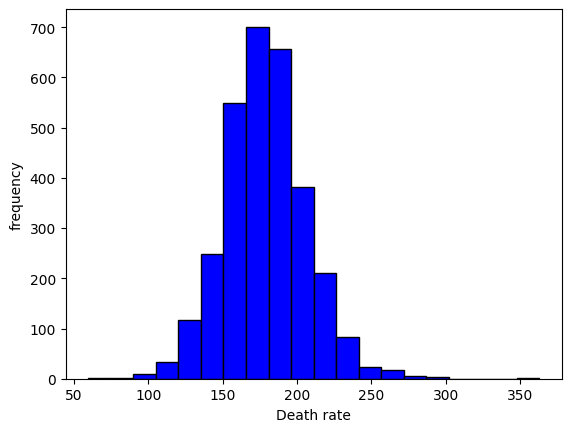

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['target_deathrate'], bins = 20,color='blue',edgecolor='black')
plt.xlabel('Death rate')
plt.ylabel('frequency')
plt.show()

In [9]:
def find_constant_column(df):
  #returns columns containing single values
  constant_columns = []
  for columns in df.columns:
    unique_values = df[columns].unique()
    if len(unique_values == 1):
      constant_columns.append(columns)
    return constant_columns

In [10]:
#caLL  constant column fucntion
cc = find_constant_column(df)
print(cc)

['avganncount']


In [11]:
def bin_to_num(data):
  #converting string values to float
  binnedinc = []
  for i in data["binnedinc"]:
    #remove parenthesis and brackets
    i = i.strip("()[]")
    print(i)
    i = i.split(",")
    print(i)
    i = tuple(i)
    print(i)
    i = tuple(map(float,i))
    print(i)
    i = list(i)
    print(i)
    binnedinc.append(i)
  data["binnedinc"] = binnedinc

  return data

In [12]:
df = bin_to_num(df)

Streaming output truncated to the last 5000 lines.
37413.8, 40362.7
['37413.8', ' 40362.7']
('37413.8', ' 40362.7')
(37413.8, 40362.7)
[37413.8, 40362.7]
40362.7, 42724.4
['40362.7', ' 42724.4']
('40362.7', ' 42724.4')
(40362.7, 42724.4)
[40362.7, 42724.4]
22640, 34218.1
['22640', ' 34218.1']
('22640', ' 34218.1')
(22640.0, 34218.1)
[22640.0, 34218.1]
40362.7, 42724.4
['40362.7', ' 42724.4']
('40362.7', ' 42724.4')
(40362.7, 42724.4)
[40362.7, 42724.4]
37413.8, 40362.7
['37413.8', ' 40362.7']
('37413.8', ' 40362.7')
(37413.8, 40362.7)
[37413.8, 40362.7]
40362.7, 42724.4
['40362.7', ' 42724.4']
('40362.7', ' 42724.4')
(40362.7, 42724.4)
[40362.7, 42724.4]
34218.1, 37413.8
['34218.1', ' 37413.8']
('34218.1', ' 37413.8')
(34218.1, 37413.8)
[34218.1, 37413.8]
34218.1, 37413.8
['34218.1', ' 37413.8']
('34218.1', ' 37413.8')
(34218.1, 37413.8)
[34218.1, 37413.8]
22640, 34218.1
['22640', ' 34218.1']
('22640', ' 34218.1')
(22640.0, 34218.1)
[22640.0, 34218.1]
37413.8, 40362.7
['37413.8', ' 403

In [13]:
def col_to_date(data):
  data["country"] = [i.split(",")[0] for i in data["geography"]]
  data["country"] = [i.split(",")[1] for i in data["geography"]]
  #drop the geography column
  data.drop("geography",axis=1,inplace = True)
  return data

In [14]:
df = col_to_date(df)

In [15]:
print(df)

      avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap            binnedinc  \
0         61898      260131            11.2   499.7482

In [18]:
from sklearn.preprocessing import OneHotEncoder


In [19]:
def one_hot_encoding(x):
  #select categorical columns
  categorical_columns = x.select_dtypes(include =["object"]).columns
  #one hot encode categorical columns
  one_hot_encoder = OneHotEncoder(sparse = False , handle_unknown = "ignore")
  one_hot_encoded = one_hot_encoder.fit_transform(x[categorical_columns])
  #convert the one hot encoded array into a dataframe
  one_hot_encoded = pd.Dataframe(
      one_hot_encoded,columns = one_hot_encoder.get_features_names_out(categorical_columns)
  )
  #drop the categorical cols from the dataframe
  x=x.drop(categorical_columns , axis=1)
  x=pd.concat([x,one_hot_encoded],axis=1)
  return x

In [20]:
df = one_hot_encoding(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']